# Retrieving Zomato Stock Data

In [46]:
# !pip install yfinance

In [47]:
# Import yfinance package
import yfinance as yf

start_date = '2021-07-23'
end_date = '2022-07-29'

# Get the data
data = yf.download('ZOMATO.NS', start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [48]:
data.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089
2021-07-30,142.600006,142.699997,131.000000,133.500000,133.500000,88312522
2021-08-02,135.750000,140.750000,135.149994,139.699997,139.699997,66909732
2021-08-03,137.000000,140.800003,137.000000,139.399994,139.399994,46610001
2021-08-04,139.800003,141.000000,135.250000,138.399994,138.399994,41134419


In [49]:
data.shape

(254, 6)

In [50]:
data['Close'].equals(data['Adj Close'])

True

Zomato has not split the face value of the share so far and has not given any dividend. So Close price and Adj Close price are both same. That's why I am going to drop one columns 

In [51]:
data.drop('Adj Close', axis=1, inplace = True)

# Stock Price Analysis

In [52]:
import numpy as np
import pandas as pd
import datetime

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-07-23 to 2022-07-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    254 non-null    float64
 1   High    254 non-null    float64
 2   Low     254 non-null    float64
 3   Close   254 non-null    float64
 4   Volume  254 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.9 KB


In [55]:
data.describe()

,Open,High,Low,Close,Volume
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,105.268504,107.577362,102.224607,104.621260,4.625101e+07
std,34.598115,35.229768,33.765832,34.558627,6.892986e+07
min,40.849998,44.400002,40.599998,41.650002,4.101820e+06
25%,75.850000,78.174997,73.199999,74.662500,1.506415e+07
50%,106.250000,107.324997,95.450001,99.674999,2.735555e+07
75%,137.162498,139.199997,133.300003,136.637497,4.497797e+07
max,161.149994,169.000000,154.250000,160.300003,6.948953e+08


In [56]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams['lines.linewidth'] = 2
# plt.style.use('fivethirtyeight')

**Let's try to visualize this stock data**

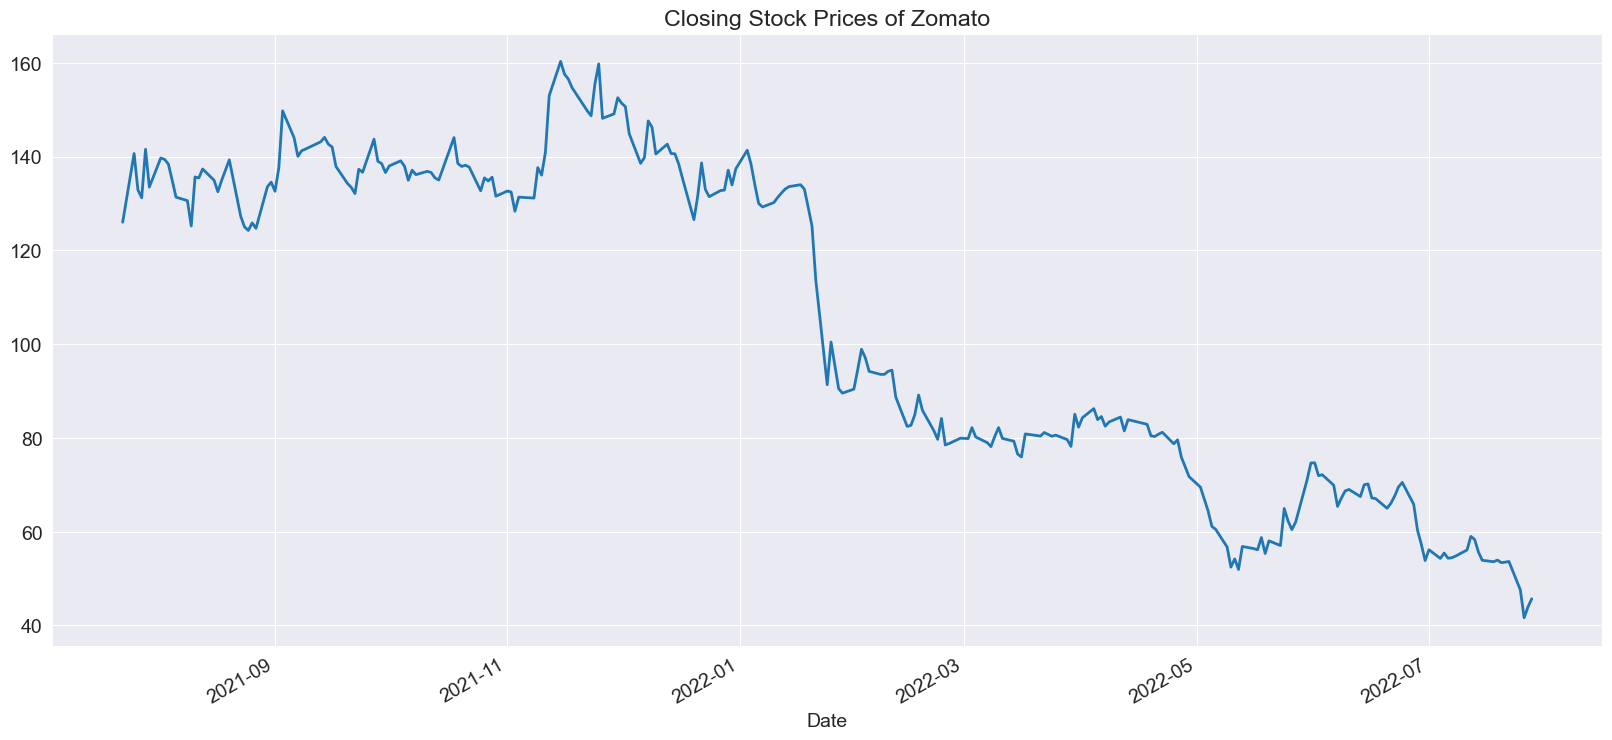

In [58]:
data['Close'].plot()

plt.title('Closing Stock Prices of Zomato')
plt.show()

We are not interested in the absolute prices for these companies but wanted to understand how these stock fluctuate with time. We can also use plotly to draw candlestick charts to visulize opening, closing, high and low prices to stocks altogether.

In [59]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
fig.update_layout(
    title='Zomato Stock Chart',
    yaxis_title='ZOMATO Stock',
)
# st.plotly_chart(fig)

Text(0.5, 1.0, 'Volume of stock traded')

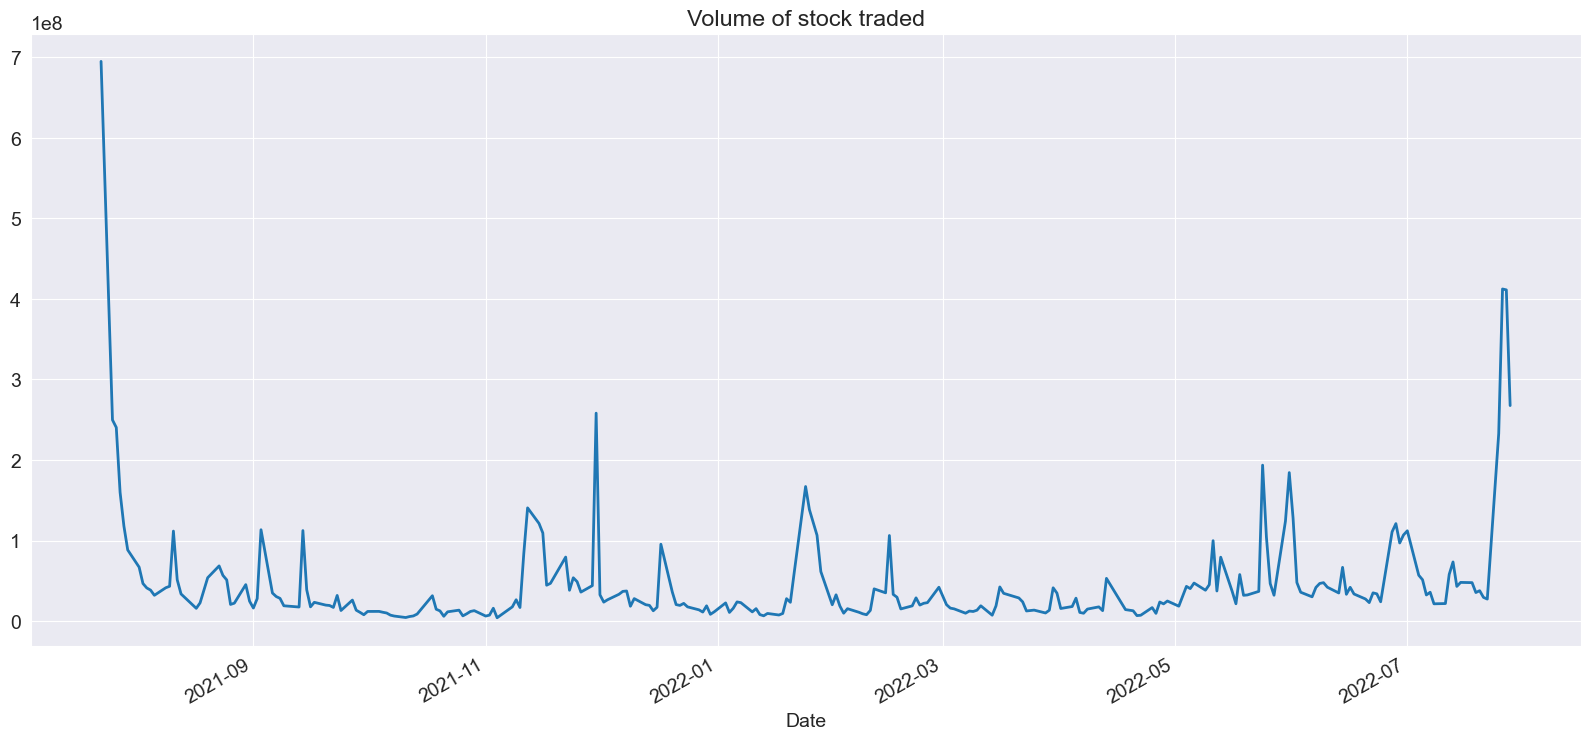

In [60]:
data['Volume'].plot()

plt.title('Volume of stock traded')

In [61]:
data.loc[data['Volume'].nlargest(2).index]

,Open,High,Low,Close,Volume
Date,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,694895290
2022-07-26,46.599998,46.650002,41.200001,41.650002,412304737


In [62]:
data.iloc[data['Close'].argmax()]

Open      1.490000e+02
High      1.633000e+02
Low       1.423500e+02
Close     1.603000e+02
Volume    1.211976e+08
Name: 2021-11-15 00:00:00, dtype: float64

Volume of stock traded of apple is highest on its IPO listing date. Second highest amount of stock traded was on 26 july and 2022. Shares of zomato hits all time low that day.

https://www.livemint.com/market/stock-market-news/why-zomato-shares-plunged-to-all-time-low-today-11658721600204.html

Now let's check total trading.

In [63]:
data['TotalTraded'] = data['Open'] * data['Volume']

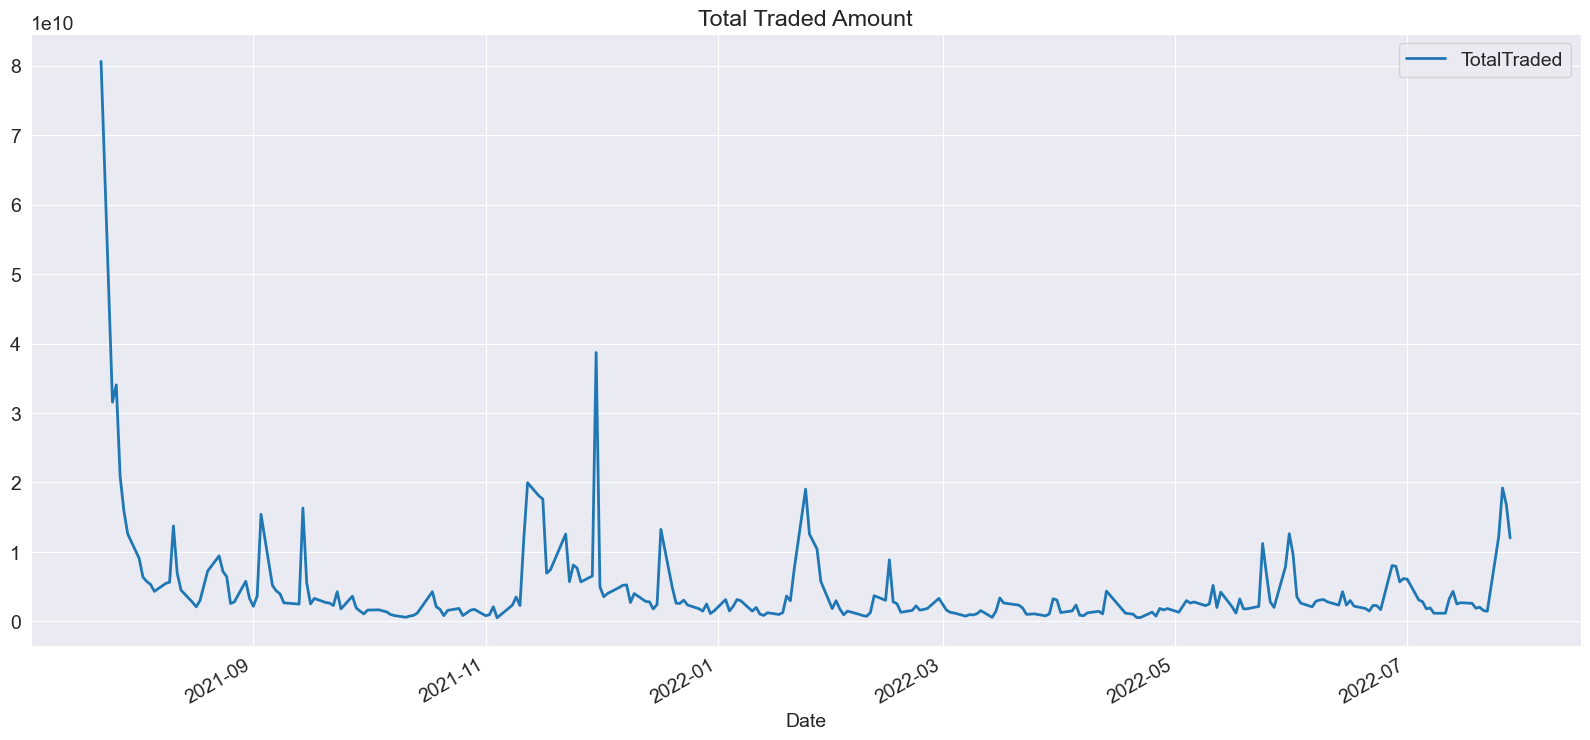

In [64]:
data['TotalTraded'].plot()

plt.title('Total Traded Amount')
plt.legend()

In [65]:
data.loc[data['TotalTraded'].nlargest(2).index]

,Open,High,Low,Close,Volume,TotalTraded
Date,,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,694895290,8.060785e+10
2021-11-30,149.949997,158.000000,145.300003,152.550003,258130152,3.870662e+10


There is a similar pattern with volume of stock traded.

As we can see from the plot above that there is somewhat positive linear correlation between opening stocks prizes of alphabet and amazon.

### Daily Percentage Gain

$$r_t = {p_t \over p_{t-1}}-1$$


In [66]:
data['returns'] = data['Close'].pct_change()

<Axes: xlabel='Date'>

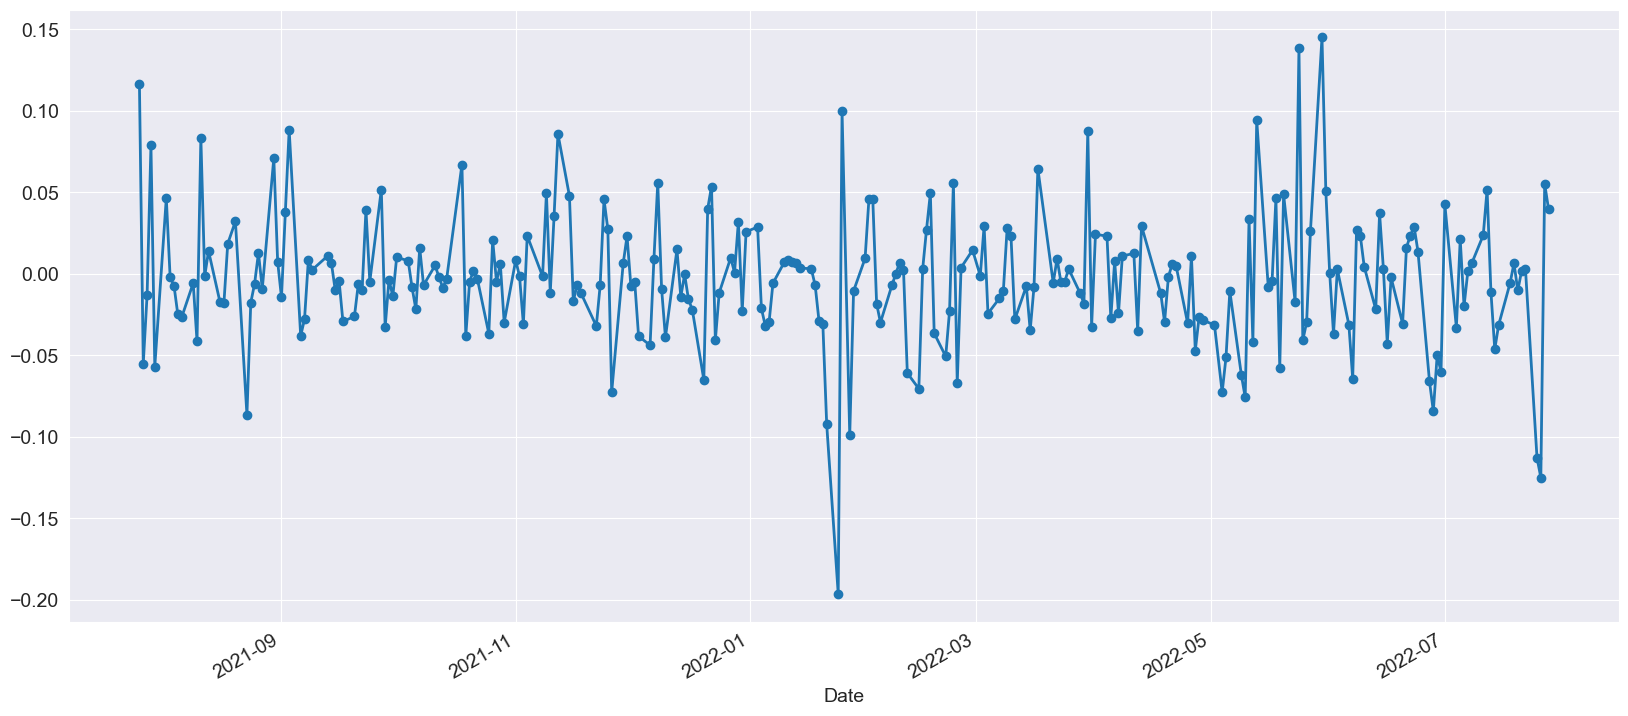

In [67]:
data['returns'].plot(marker='o')

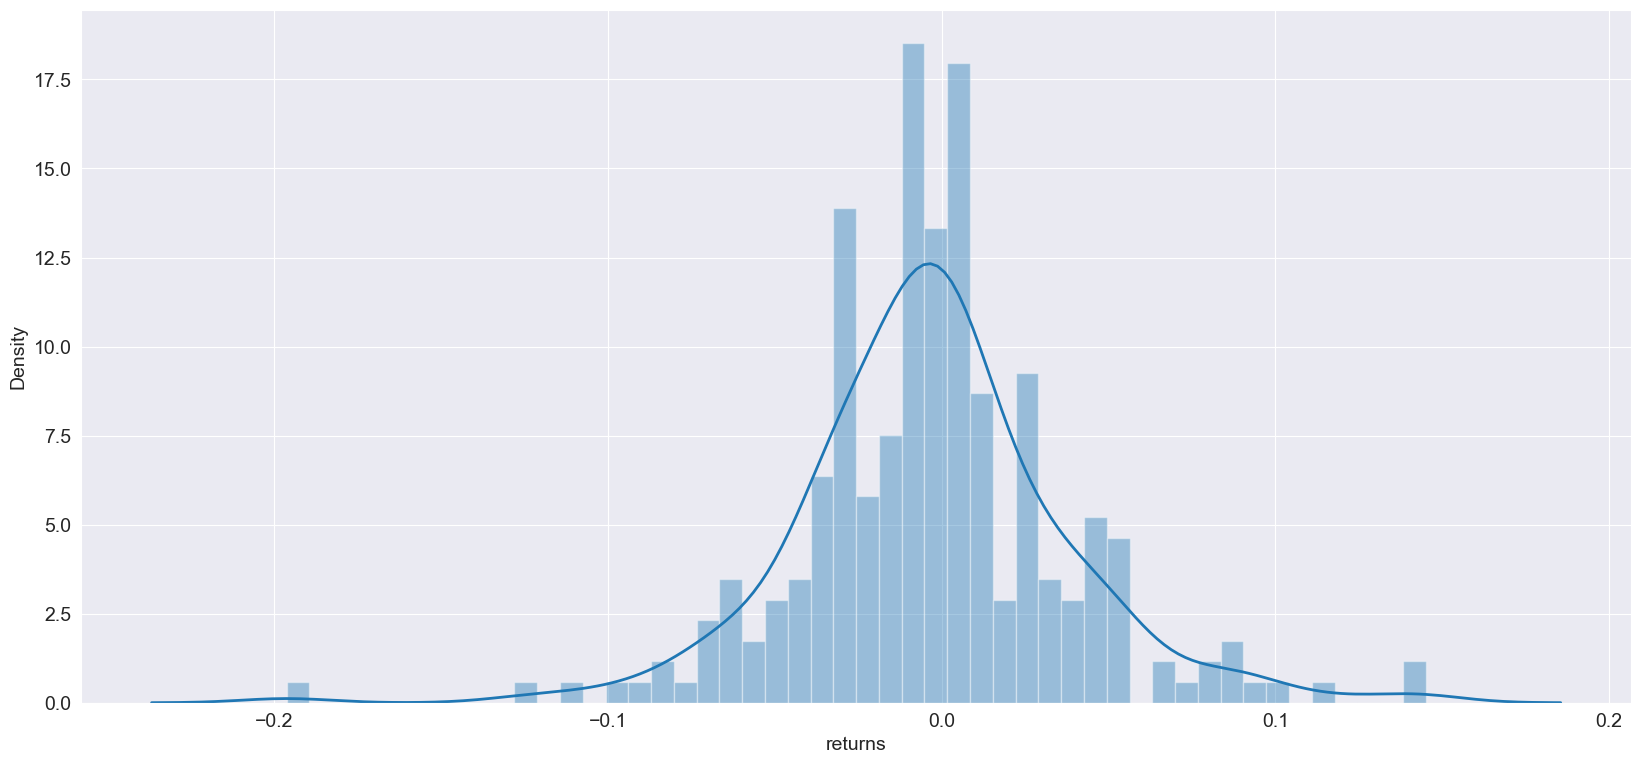

In [68]:
sns.distplot(data['returns'], bins=50);

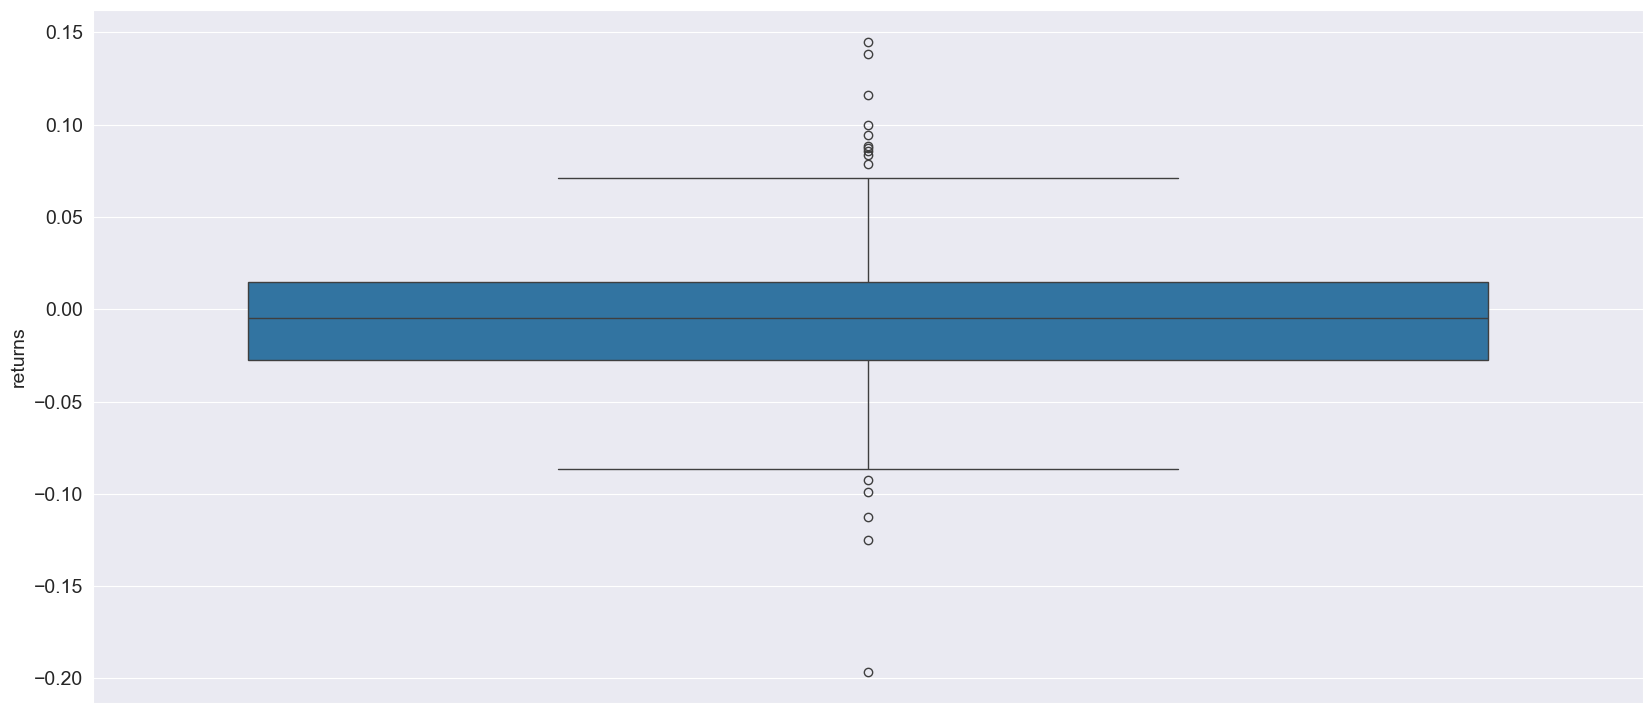

In [69]:
sns.boxplot(data['returns']);

Negative daily returns seem to be slightly more frequent than negative returns for Apple.

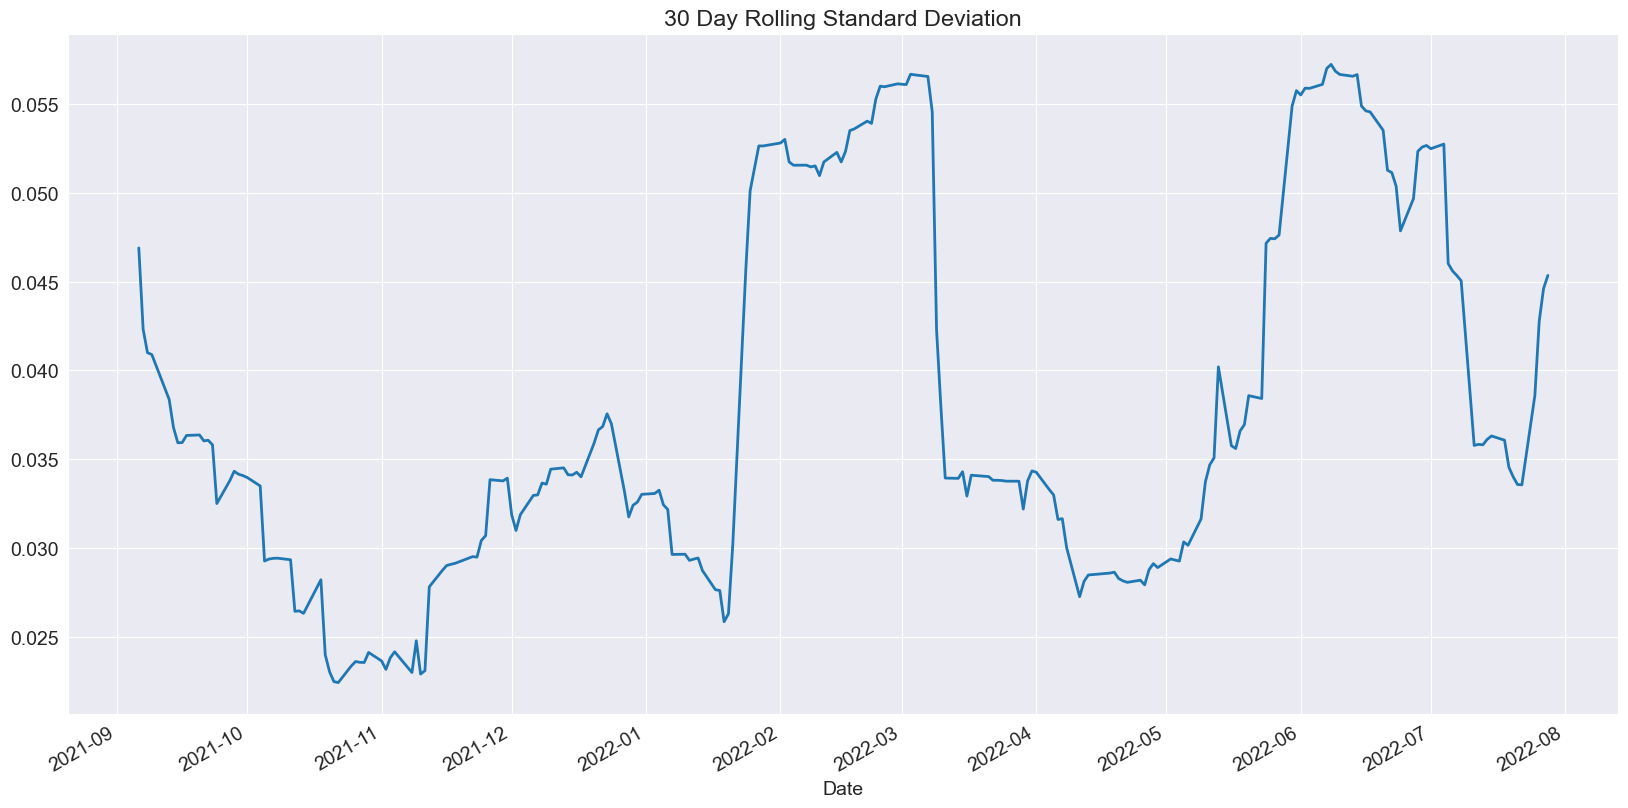

In [70]:
data['returns'].rolling(window=30).std().plot(figsize=(20, 10), title="30 Day Rolling Standard Deviation");

### Cumulative Return

$$i_t = (1+r_t)i_{t-1}$$

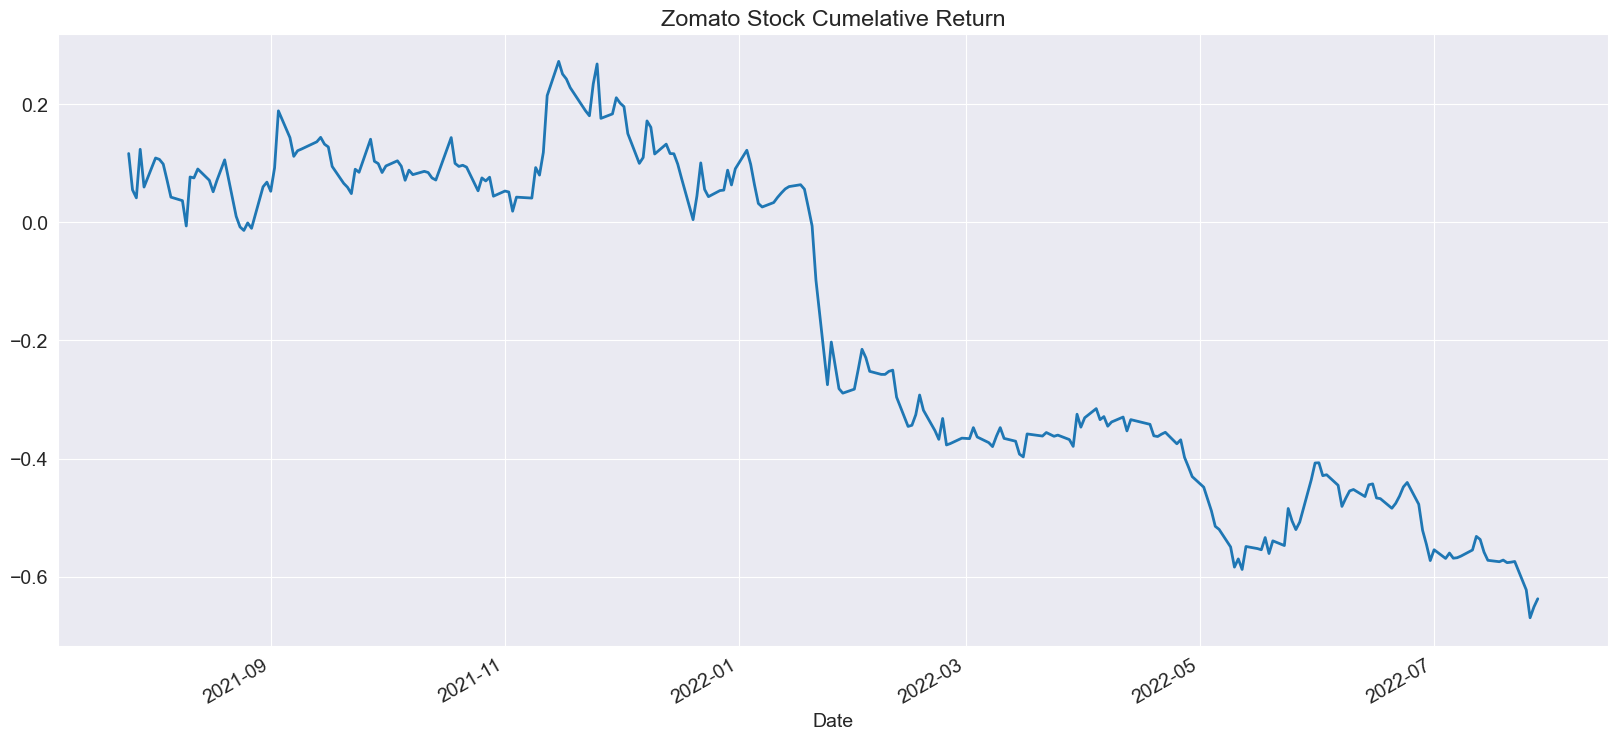

In [71]:
data['Cumulative Return'] = (1+data['returns']).cumprod()-1
data['Cumulative Return'].plot()
plt.title('Zomato Stock Cumelative Return');

## Analyzing Technical Indiacators

In [72]:
# !pip install --upgrade ta
from ta import add_all_ta_features
from ta.utils import dropna

In [73]:
ti_data = add_all_ta_features(data, open='Open', high='High', low='Low', close='Close', volume='Volume')

### Average directional movement (ADX)

- ADX ≤ 25: No trend

- 25 < ADX ≤ 50: Trending

- ADX > 50: Strong Trending

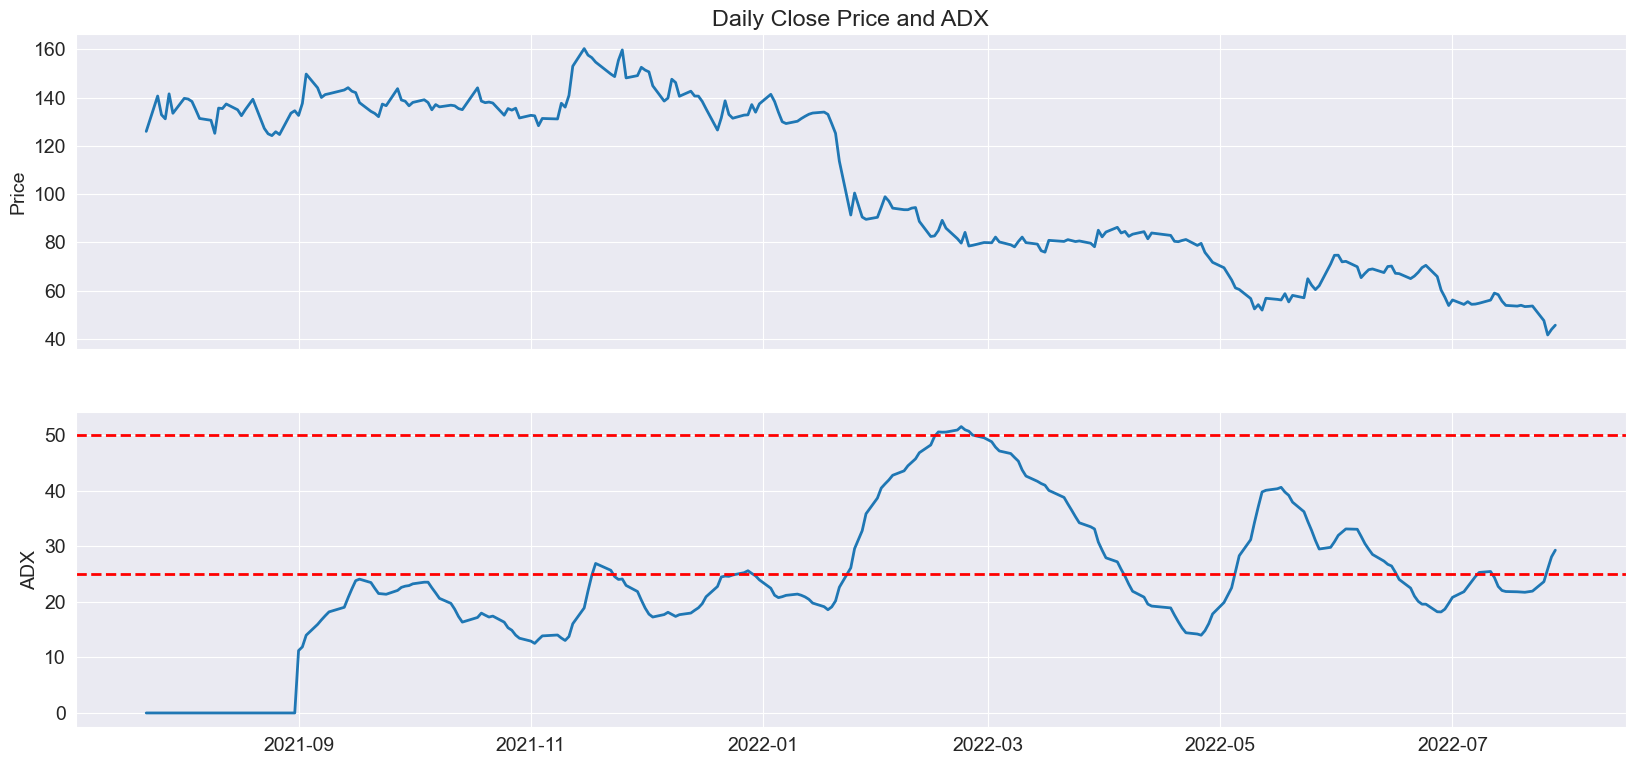

In [74]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(data['Close'])
ax2.set_ylabel('ADX')
ax2.plot(ti_data['trend_adx'])
ax1.set_title('Daily Close Price and ADX')
ax2.axhline(y = 50, color = 'r', linestyle = '--')
ax2.axhline(y = 25, color = 'r', linestyle = '--')
plt.show()

### Relative Strength Index (RSI)
- RSI > 70: Overbought

- RSI < 30: Oversold

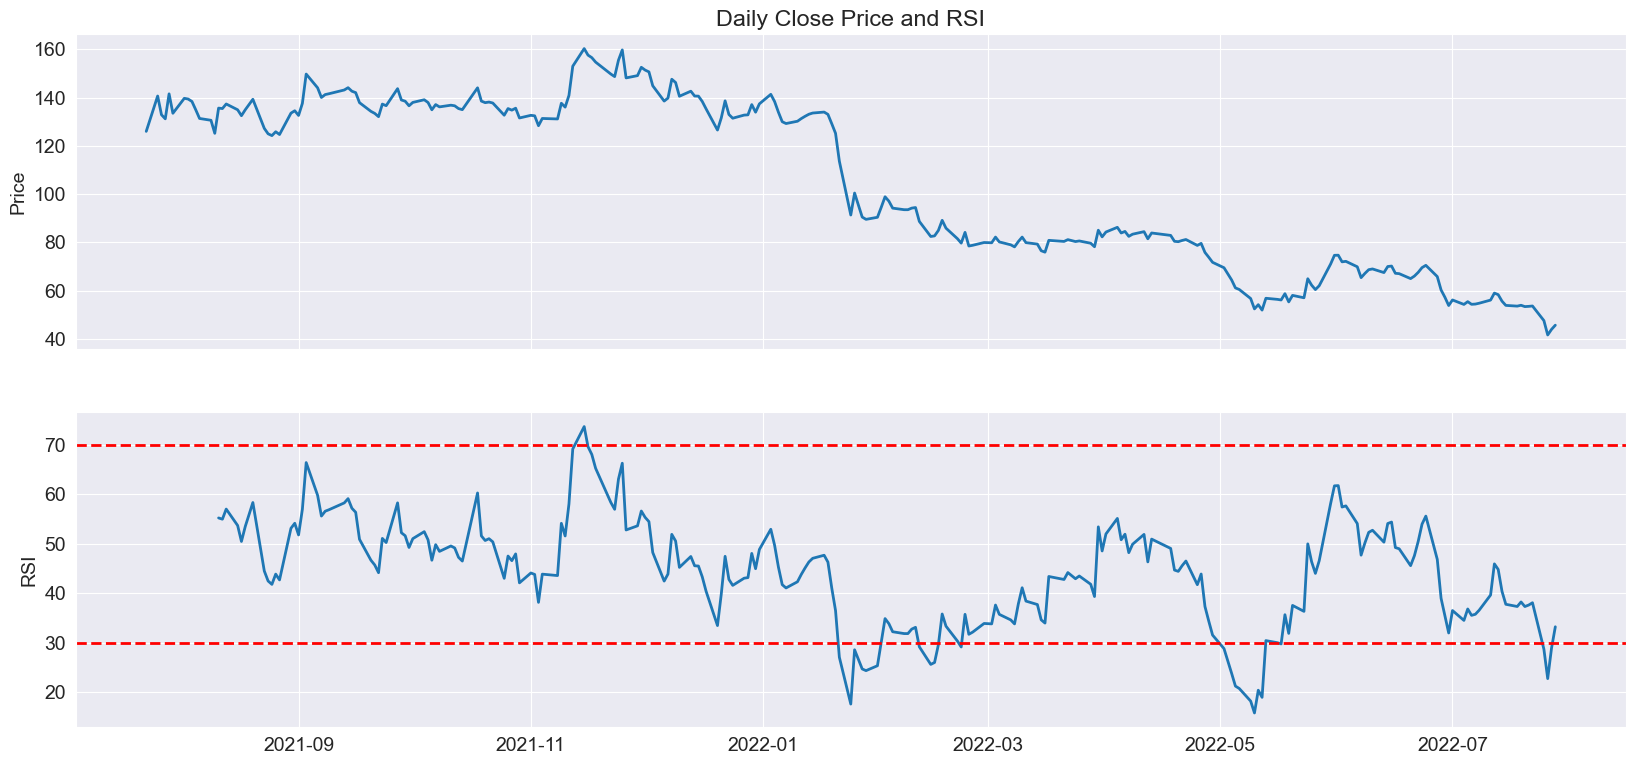

In [75]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(data['Close'])
ax2.set_ylabel('RSI')
ax2.plot(ti_data['momentum_rsi'])
ax1.set_title('Daily Close Price and RSI')
ax2.axhline(y = 70, color = 'r', linestyle = '--')
ax2.axhline(y = 30, color = 'r', linestyle = '--')
plt.show()

- Zomato stock was overbought and hit all time high at 18 nov 2021. Zomato up on news of $500 million investment in Grofers on that day.

  https://economictimes.indiatimes.com/markets/stocks/news/zomato-gains-3-on-report-of-500-million-investment-in-grofers/articleshow/87774172.cms

- From 18 jan to 22 jan there was a freefall in zomato stocks.

  https://www.livemint.com/market/stock-market-news/paytm-zomato-nykaa-shares-drop-to-record-low-is-the-unicorn-craze-over-11643345855087.html

- There was a similar trend from 27 apr to 7 may.

  https://www.livemint.com/market/stock-market-news/zomato-share-price-hits-new-low-stock-down-65-from-highs-11651818720666.html

### Value at Risk

In [76]:
import scipy

In [77]:
returns = data['returns'].dropna()

In [78]:
mean = returns.mean()
sigma = returns.std()
scipy.stats.norm.ppf(0.05, mean, sigma)

-0.07023638487305181

Analytic 0.05 quantile is at -0.0702, so with 95% confidence, our worst daily loss will not exceed 7.02%. If we have a ₹1 cr investment,one day VaR is 0.07 * 1 cr = ₹7 Lakh.

# Time-Series Forecasting

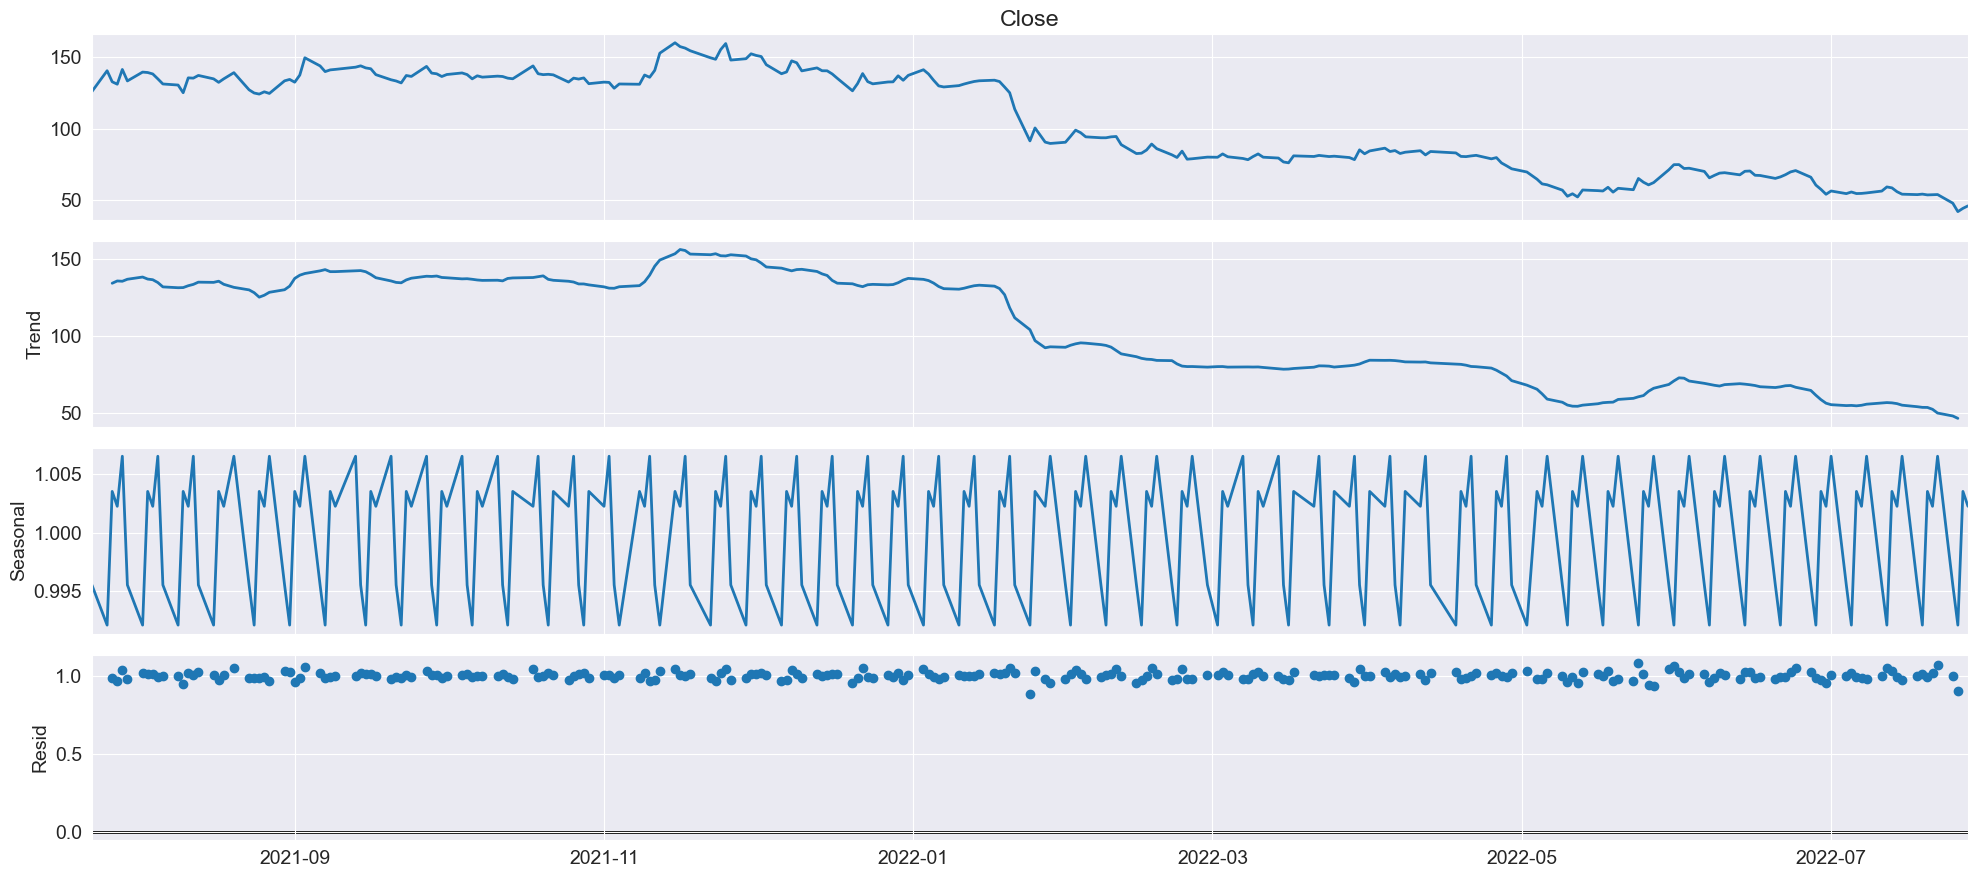

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Close'], model='mul', period=5)
result.plot();

In [80]:
# train-test split
train_data, test_data = data[:int(len(data)*0.8)], data[int(len(data)*0.8):]

### Run `pmdarima.auto_arima` to obtain recommended orders

In [81]:
# !pip install pmdarima

In [82]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima                              # for determining ARIMA orders

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=1175.419, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=1173.450, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=1176.292, Time=0.09 sec


 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=1176.152, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=1172.617, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=1175.410, Time=0.07 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=1174.120, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=1174.330, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=1174.184, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=1176.003, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5]          
Total fit time: 0.864 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  203
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -585.308
Date:                Wed, 18 Oct 2023   AIC                           1172.617
Time:                        10:07:02   BIC                           1175.925
Sample:                             0   HQIC                      

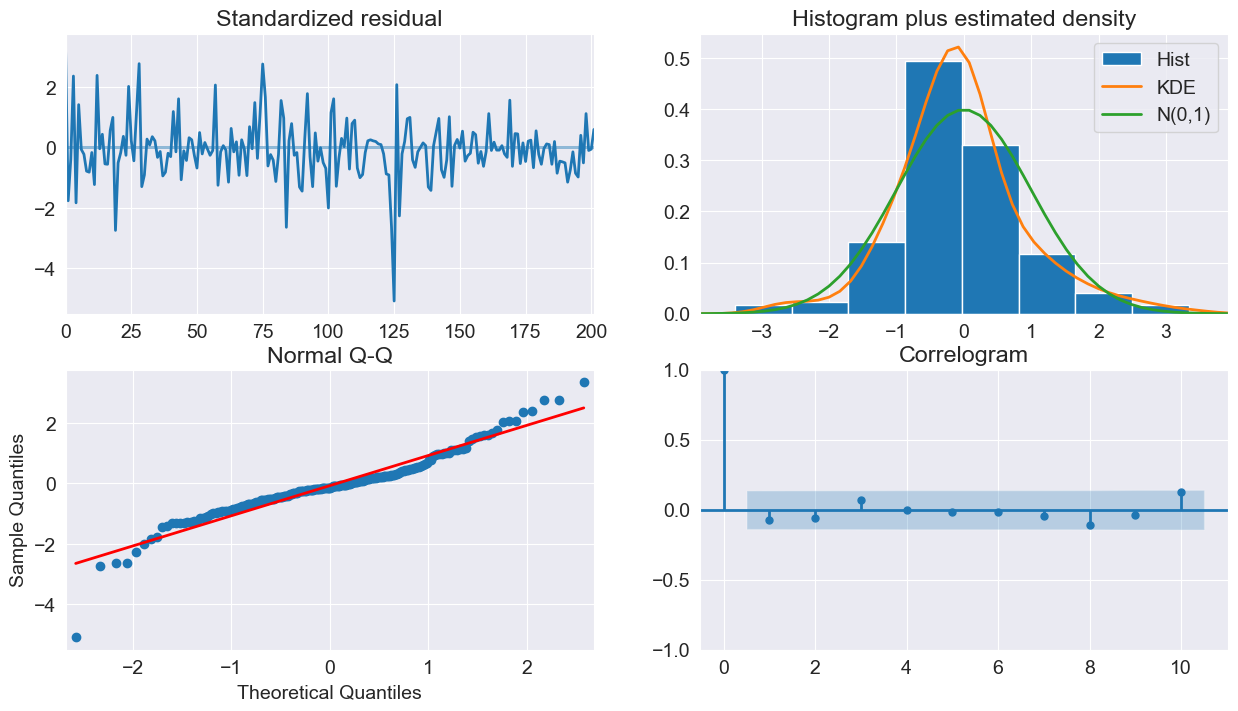

In [83]:
model_autoARIMA = auto_arima(train_data['Close'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=5,              # frequency of series
                      d=None,           # let model determine 'd'
                      start_P=0, 
                      D=0, 
                      trace=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

**Fit a `SARIMAX(0, 1, 0)` Model**

In [84]:
model = SARIMAX(train_data['Close'],order=(0,1,0))	
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  203
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -585.308
Date:                Wed, 18 Oct 2023   AIC                           1172.617
Time:                        10:07:03   BIC                           1175.925
Sample:                             0   HQIC                          1173.955
                                - 203                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        19.2451      1.129     17.045      0.000      17.032      21.458
===================================================================================
Ljung-Box (L1) (Q):                   1.07   Jarque-Bera (JB):               118.93
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
# Obtain predicted values
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(0, 1, 0) Predictions')

In [86]:
predictions.index = list(predictions.index)
predictions.index  = test_data.index

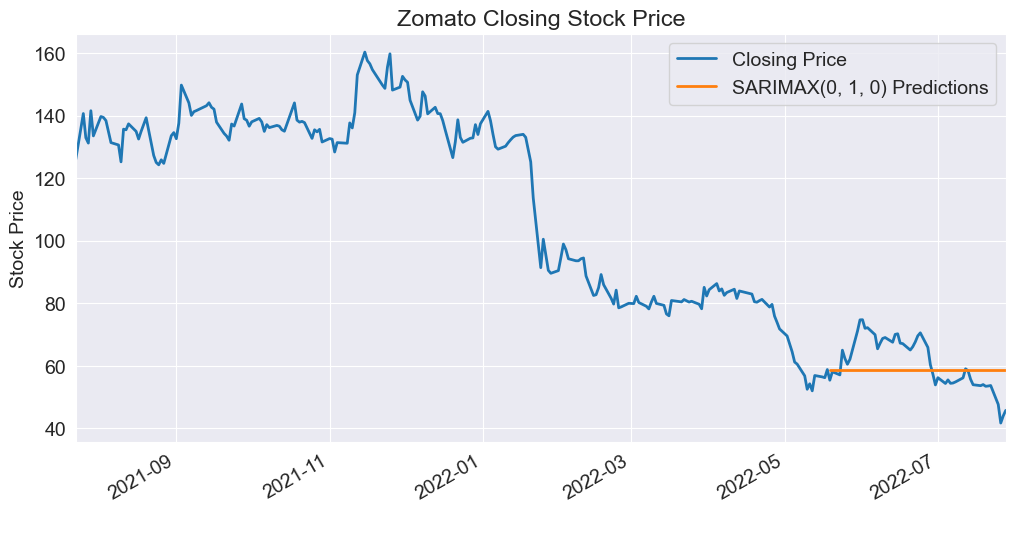

In [87]:
# Plot predictions against known values
title = 'Zomato Closing Stock Price'
ylabel='Stock Price'

ax = data['Close'].plot(legend=True,figsize=(12,6),title=title, label='Closing Price')

predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=' ', ylabel=ylabel);

**Evaluating the ARIMA model**

In [88]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test_data['Close'], predictions, squared=False)
print(f'RMSE Error: {error:11.10}')

RMSE Error: 8.382021362


# Stock Price Prediction using LSTM

In [89]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [90]:
# Filtering closing prices of apple stocks
zmt_close  = data.filter(['Close']).values

**Scaling the dataset**

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
zmt_scaled=scaler.fit_transform(zmt_close)

### Generating training data

In [92]:
period = 45

In [93]:
# Spiltting the data into training and testing dataset
training_size=int(len(zmt_scaled)*0.8)
test_size=len(zmt_scaled)-training_size
train_data,test_data=zmt_scaled[0:training_size,:],zmt_scaled[training_size-45:,:]

In [94]:
x_train = []
y_train= []

In [95]:
# Preparing target and feature sets

from tqdm import tqdm
for i in tqdm(range(period, len(train_data))):
    x_train.append(train_data[i-45:i, 0])
    y_train.append(train_data[i, 0])

100%|██████████| 158/158 [00:00<?, ?it/s]


In [96]:
# Converting features and targets from list to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [97]:
# Reshaping features into the size that is convinient for LSTM model training

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(158, 45, 1)

### Training Stacked LSTM Model

In [98]:
# Building Stacked LSTM model
model = Sequential(
    [
        LSTM(50, input_shape=(x_train.shape[1], 1), return_sequences=True),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ]
)

In [99]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [100]:
# Training the model
model.fit(x_train, y_train,
         batch_size=1,
         epochs=12)

Epoch 1/12
158/158 [==============================] - 7s 17ms/step - loss: 0.0275
Epoch 2/12
158/158 [==============================] - 3s 17ms/step - loss: 0.0081
Epoch 3/12
158/158 [==============================] - 2s 16ms/step - loss: 0.0062
Epoch 4/12
158/158 [==============================] - 3s 16ms/step - loss: 0.0050
Epoch 5/12
158/158 [==============================] - 3s 18ms/step - loss: 0.0065
Epoch 6/12
158/158 [==============================] - 4s 25ms/step - loss: 0.0047
Epoch 7/12
158/158 [==============================] - 5s 29ms/step - loss: 0.0038
Epoch 8/12
158/158 [==============================] - 6s 36ms/step - loss: 0.0047
Epoch 9/12
158/158 [==============================] - 6s 40ms/step - loss: 0.0033
Epoch 10/12
158/158 [==============================] - 3s 19ms/step - loss: 0.0034
Epoch 11/12
158/158 [==============================] - 3s 16ms/step - loss: 0.0026
Epoch 12/12
158/158 [==============================] - 2s 16ms/step - loss: 0.0031


### Prediction on test set

In [101]:
x_test, y_test = [], zmt_close[training_size:, :]

for i in range(period, len(test_data)):
    x_test.append(test_data[i-45:i, 0])

In [102]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [103]:
# Making Predictions
pred = model.predict(x_test)

2/2 [==============================] - 1s 24ms/step


In [104]:
# Converting predictions from scaled values to original values
pred = scaler.inverse_transform(pred)

In [105]:
# Computing RMSE loss
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, pred, squared = False)

4.329760894225501

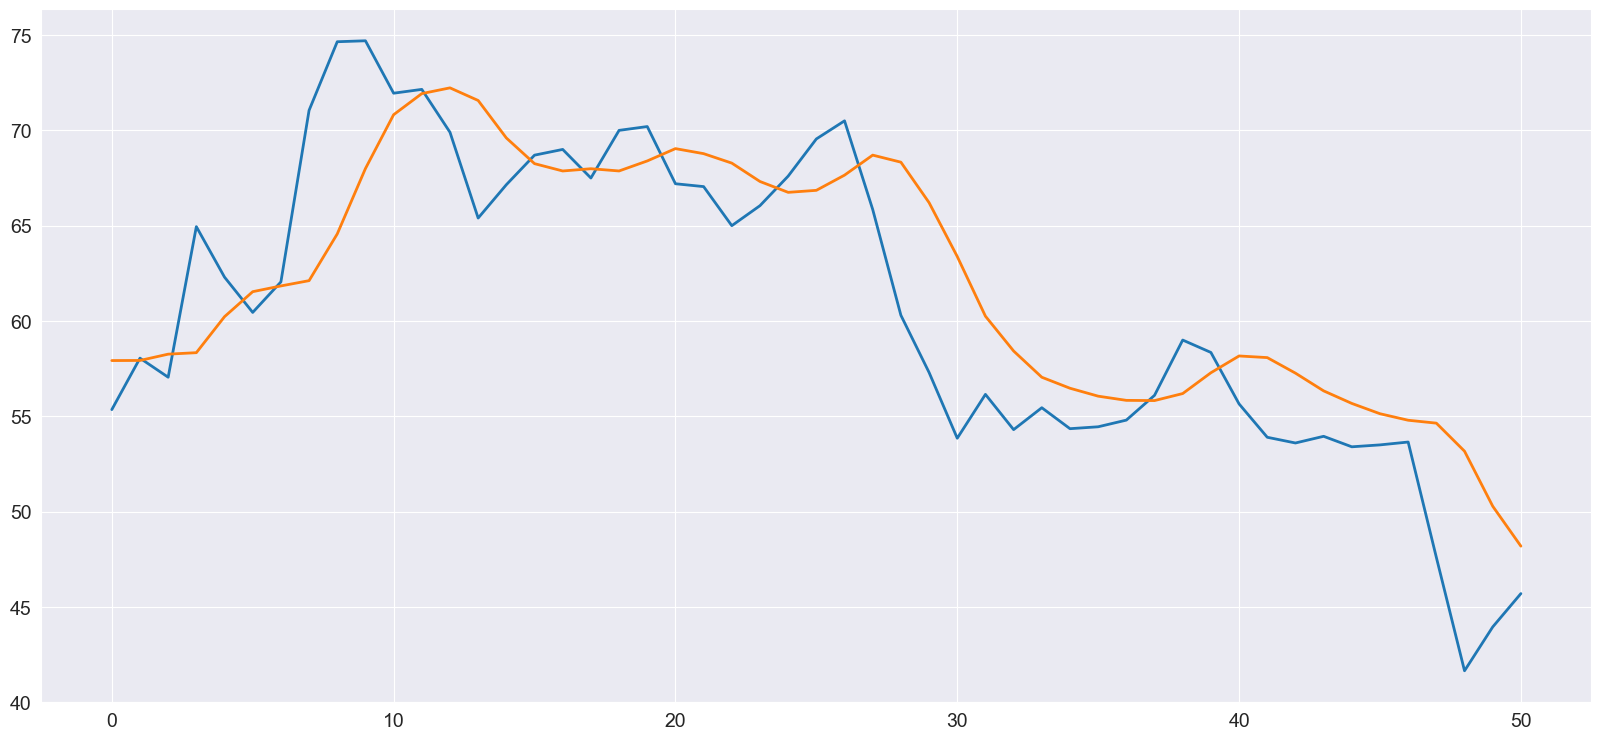

In [106]:
plt.plot(y_test)
plt.plot(pred)